In [1]:
#biblioteca opencv padrão de entrada BGR
import cv2
#essa biblioteca funciona para plots gráficos. Por isso, padrão de entrada é RGB
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
path = '/home/minski/Desktop/Faculdade/CGEPDI/'
img1 = cv2.imread(path + 'quote2.png') #abrir a imagem
img2 = cv2.imread(path + 'praia.jpg') #abrir a imagem
lena = cv2.imread(path + 'atv1/lena.png') #abrir a imagem
aluno = cv2.imread(path + 'atv1/img_aluno.jpg') #abrir a imagem
unequalized = cv2.imread(path + 'atv1/unequalized.jpg') #abrir a imagem

## 1)

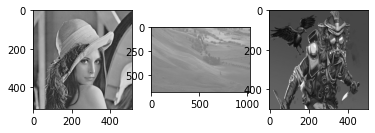

In [3]:
plt.subplot(131)
#converte BGR para escala cinza
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) 
#novamente, conversão apenas para plot
plt.imshow(cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB))

plt.subplot(132)
#converte BGR para escala cinza
img_une = cv2.cvtColor(unequalized, cv2.COLOR_BGR2GRAY) 
#novamente, conversão apenas para plot
plt.imshow(cv2.cvtColor(img_une, cv2.COLOR_BGR2RGB))

plt.subplot(133)
#converte BGR para escala cinza
img_aluno = cv2.cvtColor(aluno, cv2.COLOR_BGR2GRAY) 
#novamente, conversão apenas para plot
plt.imshow(cv2.cvtColor(img_aluno, cv2.COLOR_BGR2RGB))

## 2)

Podemos visualizar essas transformações por meio de funções traçadas num gráfico em que o eixo r indica o valor de entrada e um segundo eixo indica o valor resultante. Por exemplo, a inversão:

In [4]:
#invertendo os pixels da imagem 1 e da imagem 2.
lena_invert = 255 - lena
img_aluno_invert = 255 - aluno

(-0.5, 499.5, 499.5, -0.5)

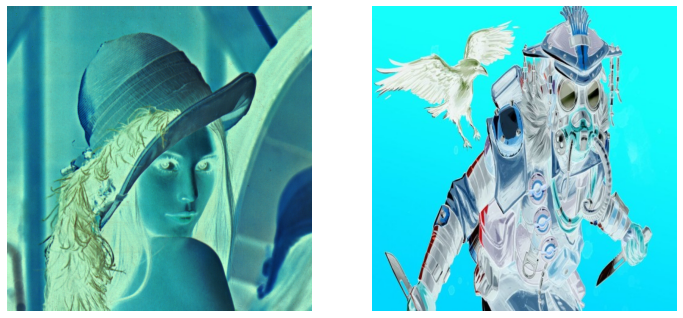

In [5]:
plt.figure(figsize=(12,12)) 
 
# defines a panel to show the images side by side
plt.subplot(121) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(cv2.cvtColor(lena_invert, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off') # remove axis with numbers

plt.subplot(122) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img_aluno_invert, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

## 3)

(-0.5, 499.5, 499.5, -0.5)

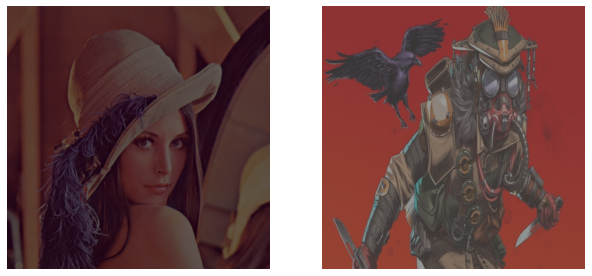

In [6]:
plt.figure(figsize=(16,16))
normalizedLena = lena
normalizedAluno = aluno
lena_norm = cv2.normalize(lena,  normalizedLena, 0, 100, cv2.NORM_MINMAX)
aluno_norm = cv2.normalize(aluno,  normalizedAluno, 50, 150, cv2.NORM_MINMAX)

plt.subplot(231) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(cv2.cvtColor(lena_norm, cv2.COLOR_BGR2RGB))
plt.axis('off') # remove axis with numbers

plt.subplot(232) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(aluno_norm, cv2.COLOR_BGR2RGB))
plt.axis('off')

## 4)

In [7]:
#Calculo do valor da constante C
c_scale = 255 / (np.log2(1+255))
z = np.arange(256)

#Calculo da transformação
z_log2 = c_scale * np.log2(z + 1)


In [8]:
lena_pb = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) 
aluno_pb = cv2.cvtColor(aluno, cv2.COLOR_BGR2GRAY) 
#Aplica a função das duas imagens
#np.int32 converte pra inteiro de 32 bits...e o resultado converte pra unsigned int 8.
lena_log2 = (c_scale * np.log2(1 + lena.astype(np.int32))).astype(np.uint8)
aluno_log2 = (c_scale * np.log2(1 + aluno.astype(np.int32))).astype(np.uint8)

(-0.5, 499.5, 499.5, -0.5)

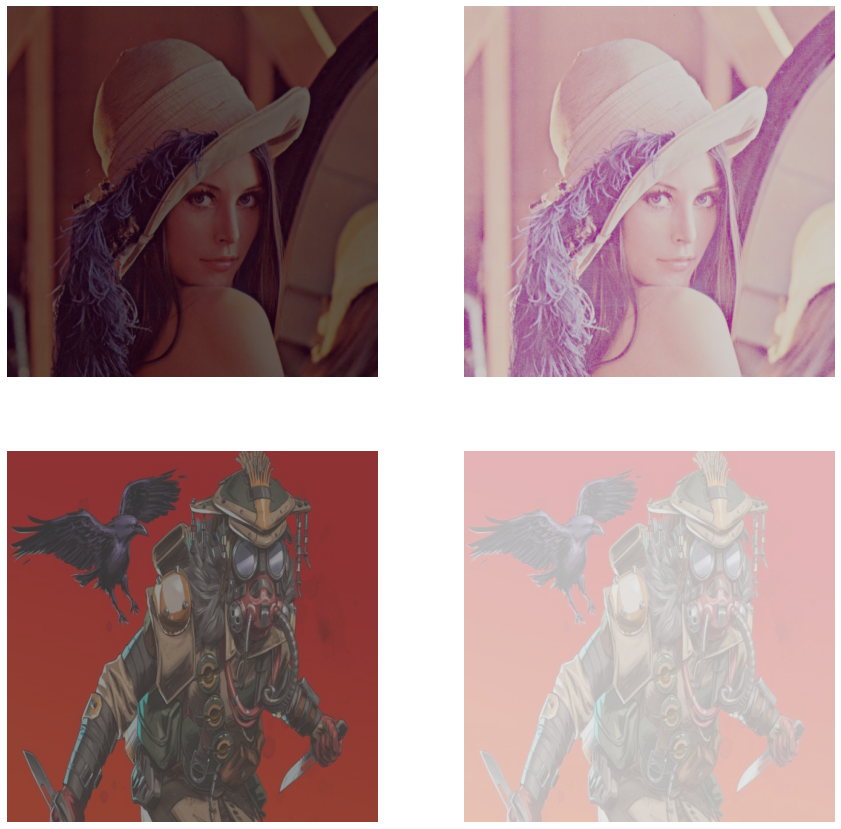

In [10]:
plt.figure(figsize=(15,15)) 
 
plt.subplot(221)
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(lena_log2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(223)
plt.imshow(cv2.cvtColor(aluno, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(224)
plt.imshow(cv2.cvtColor(aluno_log2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

## 5)

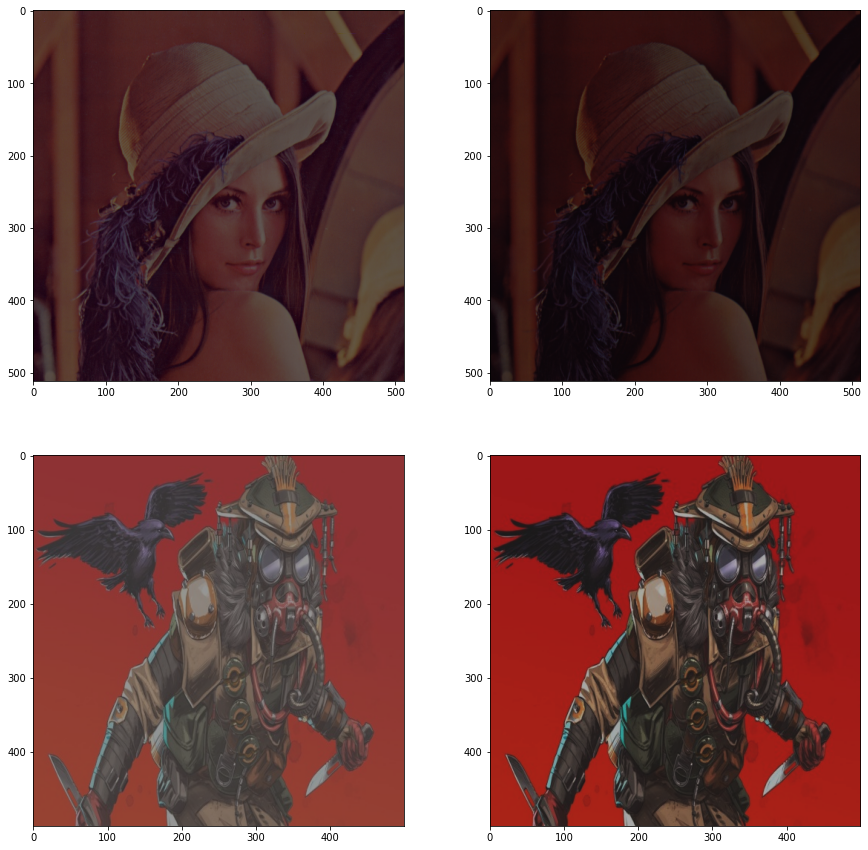

In [11]:
k = 0.03
lena_sigm = (255/(1+np.exp(-k*(lena.astype(np.int32)-127)))).astype(np.uint8)
aluno_sigm = (255/(1+np.exp(-k*(aluno.astype(np.int32)-127)))).astype(np.uint8)

plt.figure(figsize=(15,15)) 
plt.subplot(221)
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB), cmap="gray")
plt.subplot(222)
plt.imshow(cv2.cvtColor(lena_sigm, cv2.COLOR_BGR2RGB), cmap="gray")

plt.subplot(223)
plt.imshow(cv2.cvtColor(aluno, cv2.COLOR_BGR2RGB), cmap="gray")
plt.subplot(224)
plt.imshow(cv2.cvtColor(aluno_sigm, cv2.COLOR_BGR2RGB), cmap="gray")

## 5)

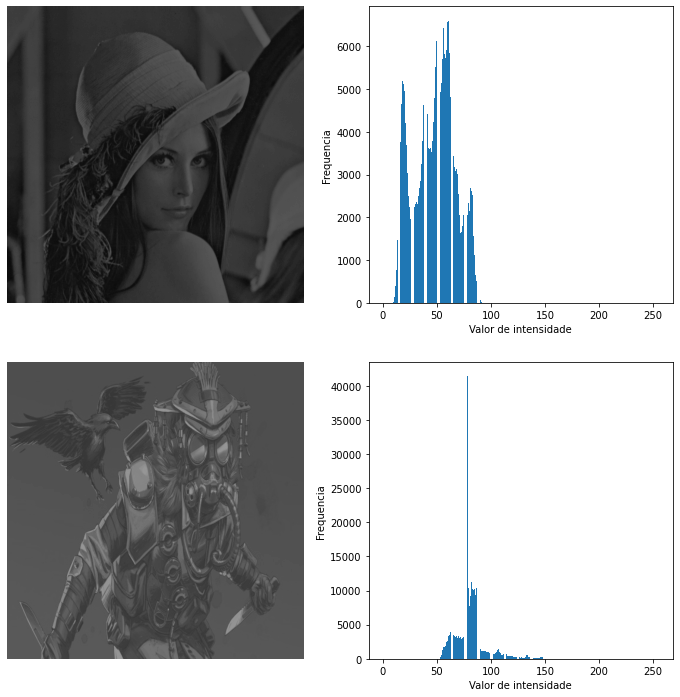

In [37]:
img3 = lena
img4 = aluno

# calculamos o histograma considerando a contagem de 256 valores (tons de cinza)
#novamente precisei deixar no modelo BGR pelo fato do OPENCV. Se usar outra bib, por exemplo imageio
#isso nao é necessario. 
img3_pb = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_pb = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

hist_img1 = histogram(img3_pb, 256)
hist_img2 = histogram(img4_pb , 256)

# exibindo imagens e histogramas (note que uso vmin, vmax para exibir todo o intervalo de tons de cinza)
plt.figure(figsize=(12,12)) 
plt.subplot(221)
plt.imshow(img3_pb, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(223)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')
plt.show()

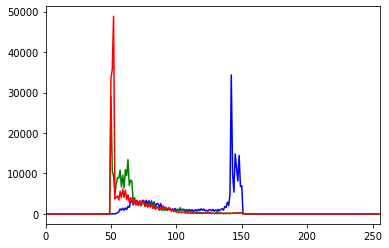

In [35]:
#em imagem colorida
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([cv2.cvtColor(aluno, cv2.COLOR_BGR2RGB)],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


In [26]:
def histogram_equalization(A, values):
    # obtem histograma em matriz com total de valores dado por 'values'
    hist = histogram(A, values)
    
    # cria histograma cumulativo vazio, do mesmo tamanho do histograma 
    histC = np.zeros(hist.shape).astype(int)

    # calcula histograma cumulativo
    histC[0] = hist[0]
    for i in range(1, values):
        histC[i] = hist[i] + histC[i-1]

    # tamanho da imagem/matriz    
    N, M = A.shape
    
    # o vetor abaixo e usado para guardar a funcao de transformacao, 
    # apenas para propositos didaticos (iremos visualizar posteriormente)
    hist_transform = np.zeros(values).astype(np.uint8)
    
    # nova imagem equalizada
    A_eq = np.zeros(A.shape).astype(np.uint8)
    
    # transforma as intensidades de 'A' usando histC como funcao de transferencia
    # para cada tom de cinza
    for r in range(values):
        # computa qual seria o novo valor 's', dado o valor atual 'r' 
        s = ((values-1)/float(M*N))*histC[r]
        
        # em toda posicao de "A" que existir um valor 'r', 
        # entao na nova imagem esse pixel sera 's'
        A_eq[ np.where(A == r) ] = s
        
        # guardamos a transformacao
        hist_transform[r] = s
    
    return (A_eq, hist_transform)

Equalizando as imagens. Repare que a equalizacao de histograma tenta deixar o histograma mais proximo do uniformemente distribuido.

## 6)

In [29]:
img3_pb = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
img4_pb = cv2.cvtColor(aluno, cv2.COLOR_BGR2GRAY)

img1_eq, img1_transf = histogram_equalization(img3_pb, values=256)
img2_eq, img2_transf = histogram_equalization(img4_pb, values=256)

Text(0, 0.5, 'Frequencia')

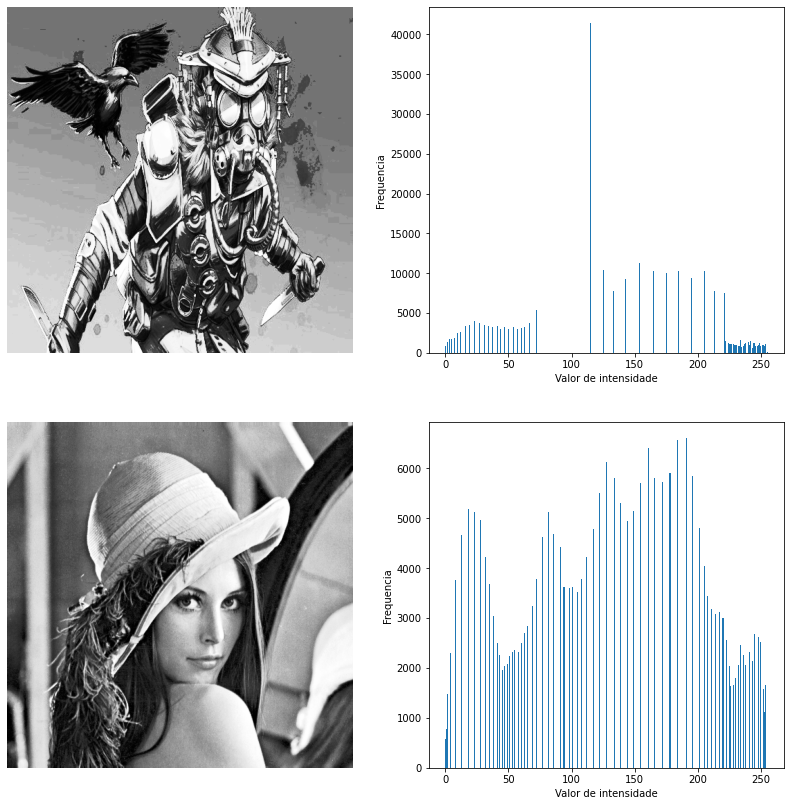

In [34]:
# novos histogramas
histeq_img1 = histogram(img1_eq, 256)
histeq_img2 = histogram(img2_eq, 256)

plt.figure(figsize=(14,14)) 
plt.plot(range(256), img1_transf)
plt.xlabel('valor original (r)')
plt.ylabel('valor transformado (s)')

plt.subplot(2,2,1)
plt.imshow(img2_eq, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2,2,2)
plt.bar(range(256), histeq_img2)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(2,2,3)
plt.imshow(img1_eq, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2,2,4)
plt.bar(range(256), histeq_img1)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

No OpenCV e numpy, há métodos já disponíveis para acesso a histogramas e equalização

# Referências:
Livro de Richard Szeliski: http://szeliski.org/Book/